# Proyek Analisis Data: Bike Sharing Dataset 


# Menentukan Pertanyaan Bisnis
- Bagaimana pola penggunaan sepeda berubah sepanjang musim?
- Bagaimana korelasi antara kondisi cuaca (weathersit) dan jumlah pengguna sepeda?
- Bagaimana rata-rata pengguna sepeda setiap jamnya?
- Bagaimana pola penggunaan sepeda berubah dari bulan ke bulan?


## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
pwd = os.getcwd()

# Data Wrangling

# Gathering Data

In [3]:
df_daily = pd.read_csv(pwd + '\\data\\day.csv')
df_daily

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [4]:
df_hourly = pd.read_csv(pwd + '\\data\\hour.csv')
df_hourly

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [5]:
daily_modified = df_daily.copy()
hourly_modified = df_hourly.copy()

# Assesing Data

In [6]:
daily_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
hourly_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
daily_modified.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [9]:
hourly_modified.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [10]:
daily_modified.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
hourly_modified.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
print('number of duplicates: ', daily_modified.duplicated().sum())

number of duplicates:  0


In [13]:
print('number of duplicates: ', hourly_modified.duplicated().sum())

number of duplicates:  0


# Cleaning Data

In [14]:
daily_modified = daily_modified.drop(columns=['temp','atemp', 'hum', 'windspeed'])
hourly_modified = hourly_modified.drop(columns=['temp','atemp', 'hum', 'windspeed'])

In [15]:
daily_modified['dteday'] = pd.to_datetime(daily_modified['dteday'])
hourly_modified['dteday'] = pd.to_datetime(hourly_modified['dteday'])

In [16]:
daily_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   casual      731 non-null    int64         
 10  registered  731 non-null    int64         
 11  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), int64(11)
memory usage: 68.7 KB


In [17]:
hourly_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  casual      17379 non-null  int64         
 11  registered  17379 non-null  int64         
 12  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), int64(12)
memory usage: 1.7 MB


In [18]:
daily_modified = daily_modified.rename(columns={'cnt': 'Total'})
hourly_modified = hourly_modified.rename(columns={'cnt': 'Total'})

In [19]:
daily_modified['season'] = daily_modified['season'].astype('category')
hourly_modified['season'] = hourly_modified['season'].astype('category')
daily_modified['season'] = daily_modified['season'].cat.rename_categories({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'})
hourly_modified['season'] = hourly_modified['season'].cat.rename_categories({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'})

In [20]:
daily_modified['weathersit'] = daily_modified['weathersit'].astype('category')
hourly_modified['weathersit'] = hourly_modified['weathersit'].astype('category')
daily_modified['weathersit'] = daily_modified['weathersit'].cat.rename_categories({1: 'Clear', 2: 'Misty', 3: 'Light Precipitation', 4: 'Heavy Precipitation'})
hourly_modified['weathersit'] = hourly_modified['weathersit'].cat.rename_categories({1: 'Clear', 2: 'Misty', 3: 'Light Precipitation', 4: 'Heavy Precipitation'})

In [21]:
daily_modified

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,casual,registered,Total
0,1,2011-01-01,Winter,0,1,0,6,0,Misty,331,654,985
1,2,2011-01-02,Winter,0,1,0,0,0,Misty,131,670,801
2,3,2011-01-03,Winter,0,1,0,1,1,Clear,120,1229,1349
3,4,2011-01-04,Winter,0,1,0,2,1,Clear,108,1454,1562
4,5,2011-01-05,Winter,0,1,0,3,1,Clear,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,Winter,1,12,0,4,1,Misty,247,1867,2114
727,728,2012-12-28,Winter,1,12,0,5,1,Misty,644,2451,3095
728,729,2012-12-29,Winter,1,12,0,6,0,Misty,159,1182,1341
729,730,2012-12-30,Winter,1,12,0,0,0,Clear,364,1432,1796


In [22]:
hourly_modified

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,casual,registered,Total
0,1,2011-01-01,Winter,0,1,0,0,6,0,Clear,3,13,16
1,2,2011-01-01,Winter,0,1,1,0,6,0,Clear,8,32,40
2,3,2011-01-01,Winter,0,1,2,0,6,0,Clear,5,27,32
3,4,2011-01-01,Winter,0,1,3,0,6,0,Clear,3,10,13
4,5,2011-01-01,Winter,0,1,4,0,6,0,Clear,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,Winter,1,12,19,0,1,1,Misty,11,108,119
17375,17376,2012-12-31,Winter,1,12,20,0,1,1,Misty,8,81,89
17376,17377,2012-12-31,Winter,1,12,21,0,1,1,Clear,7,83,90
17377,17378,2012-12-31,Winter,1,12,22,0,1,1,Clear,13,48,61


# Exploratory Data

### Explore ...

In [23]:
col_season = daily_modified[['season','casual','registered','Total']]
melt_season = pd.melt(col_season,id_vars='season', var_name='users',value_name= 'Daily Rental Count')
melt_season

,season,users,Daily Rental Count
0,Winter,casual,331
1,Winter,casual,131
2,Winter,casual,120
3,Winter,casual,108
4,Winter,casual,82
...,...,...,...
2188,Winter,Total,2114
2189,Winter,Total,3095
2190,Winter,Total,1341
2191,Winter,Total,1796


In [24]:
col_weathersit = hourly_modified[['weathersit','casual','registered','Total']]
melt_weathersit = pd.melt(col_weathersit,id_vars='weathersit', var_name='users',value_name= 'Daily Rental Count')

In [25]:
hourly_rental = hourly_modified.groupby(by='hr')['Total'].mean()
hourly_rental

hr
0      53.898072
1      33.375691
2      22.869930
3      11.727403
4       6.352941
5      19.889819
6      76.044138
7     212.064649
8     359.011004
9     219.309491
10    173.668501
11    208.143054
12    253.315934
13    253.661180
14    240.949246
15    251.233196
16    311.983562
17    461.452055
18    425.510989
19    311.523352
20    226.030220
21    172.314560
22    131.335165
23     87.831044
Name: Total, dtype: float64

In [26]:
monthly_rental = daily_modified.groupby(by='mnth')['Total'].mean()
monthly_rental

mnth
1     2176.338710
2     2655.298246
3     3692.258065
4     4484.900000
5     5349.774194
6     5772.366667
7     5563.677419
8     5664.419355
9     5766.516667
10    5199.225806
11    4247.183333
12    3403.806452
Name: Total, dtype: float64

# Visualization Data

### Pertanyaan 1:

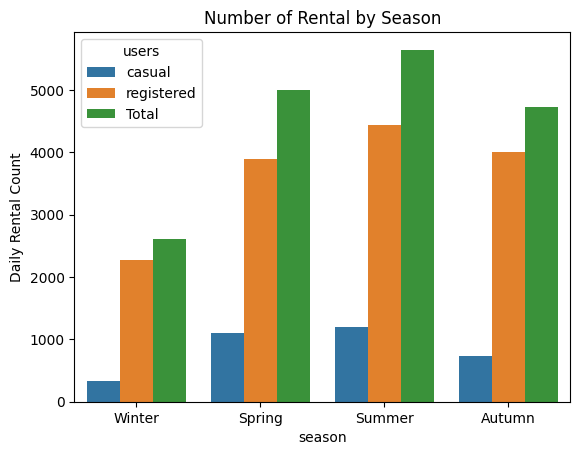

In [27]:
sns.barplot(data=melt_season, x="season", y="Daily Rental Count", hue="users", errorbar=None)
plt.title('Number of Rental by Season')
plt.show()

### Pertanyaan 2:

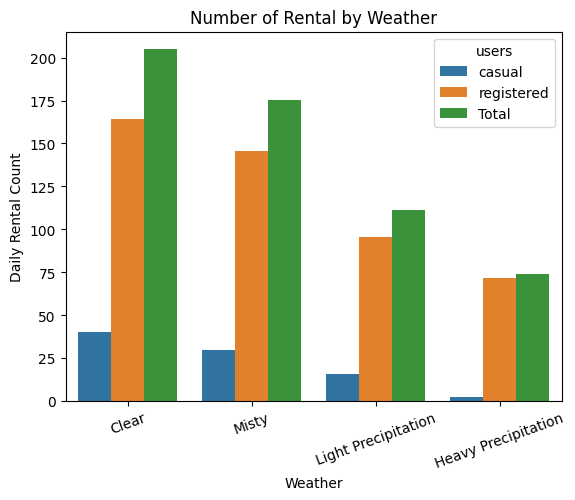

In [28]:
sns.barplot(data=melt_weathersit, x="weathersit", y="Daily Rental Count", hue="users", errorbar=None)
plt.xticks(rotation=20)
plt.title('Number of Rental by Weather')
plt.xlabel('Weather')
plt.show()

### Pertanyaan 3:

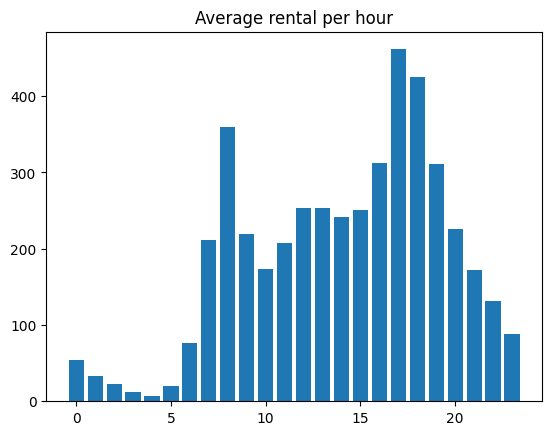

In [29]:
plt.bar(hourly_rental.index, hourly_rental.values)
plt.title('Average rental per hour')
plt.show()

### Pertanyaan 4:

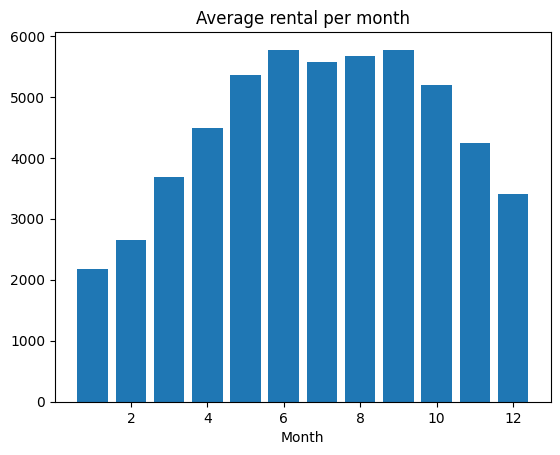

In [30]:
plt.bar(monthly_rental.index, monthly_rental.values)
plt.title('Average rental per month')
plt.xlabel('Month')
plt.show()

In [31]:
daily_modified.to_csv(pwd + "\\dashboard\\daily_modified_df.csv", index=False)
hourly_modified.to_csv(pwd + "\\dashboard\\hourly_modified_df.csv", index=False)
melt_season.to_csv(pwd + "\\dashboard\\melt_season_df.csv", index=False)
melt_weathersit.to_csv(pwd + "\\dashboard\\melt_weathersit_df.csv", index=False)

# Conclusion
- conclusion pertanyaan 1: Dari grafik terlihat berbentuk left-skewed distribution yang kurang sempurna, dengan jumlah pengguna tertinggi pada musim summer dan jumlah pengguna terendah pada musim winter
- conclusion pertanyaan 2: Grafik menggambarkan distribusi right-skewed distribution, dengan pengguna sepeda terbanyak pada cuaca yang cerah/clear dan jumlah pengguna terendah pada cuaca curah hujan lebat/Heavy precipitation
- conclusion pertanyaan 3: Rata-rata pengguna sepeda mengalami peningkatan yang mencolok pada dua waktu tertentu, yaitu pada saat jam berangkat kerja sekitar pukul 08.00 pagi, dan pada saat jam pulang kerja sekitar pukul 17.00.
- conclusion pertanyaan 4: Pola pengguna sepeda dari awal tahun mengalami peningkatan hingga pertengahan tahun sekitar bulan Juni. Dari bulan Juni hingga September terlihat bahwa pengguna sepeda cenderung stabil, dan mulai mengalami penurunan pada bulan oktober hingga akhir tahun